# Dataset 1: Working with a noisy straight line

First, we import the required libraries and modules, `numpy`, `matplotlib.pyplot` for plotting the curves and `curve_fit` to fit the data to a required curve. `%matplotlib inline` is a magic command that displays the plots directly below the cell that produced it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

## Loading the data and plotting it

* We use the `loadtxt` function of `numpy` to store the data in `dataset1.txt` in a 2-D array called `data1`.

* We extract its first column and store it to the 1-D array `x_data1` and its second column to the 1-D array `y_data1`.

* Using `plot` function of `matplotlib.pyplot` we plot the data. Using `title`, `xlabel` and `ylabel` from `matplotlib.pyplot`, title and axis labels can be added to the graph.

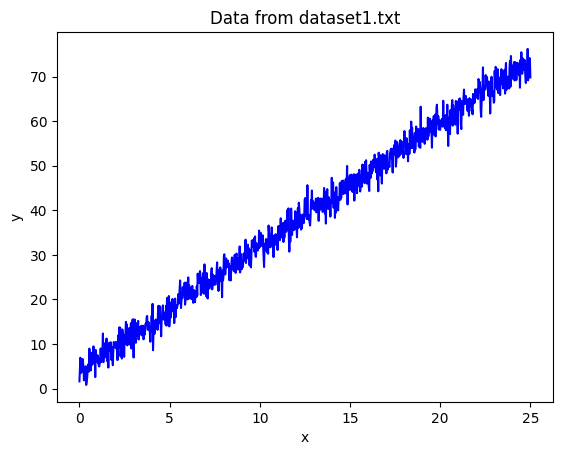

In [3]:
#loading the data
data1 = np.loadtxt("dataset1.txt")

#extracting and storing into arrays
x_data1=data1[:,0]
y_data1=data1[:,1]

#plotting the data
plt.plot(x_data1,y_data1,"-b")
plt.title("Data from dataset1.txt")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Fitting the data to a curve
* The data when plotted resembles a straight line with noise added to it. So the curve can be assumed to be in the form of $y=mx+c$.

* We perform linear fitting using `numpy.linalg.lstsq` rather than `scipy.optimize.curve_fit` in this case as it is much faster.

* Let the datapoints be in the form $(x_{i},y_{i})$ where $i = 1, 2, 3 .... n$. A system of n equations can be constructed using these n datapoints:

$$y_{1}=mx_{1}+c$$
$$y_{2}=mx_{2}+c$$
$$...$$
$$y_{n}=mx_{n}+c$$

* These set of equations can be restructured into a matrix and the parameters $m$ and $c$ can be approximated by the least squares approximation, using `lstsq` function from `numpy.linalg` module.

$$
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
=
\begin{pmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\
x_n & 1
\end{pmatrix}
\begin{pmatrix}
m \\
c
\end{pmatrix}
\equiv
\mathbf{M}\mathbf{p}
$$

* The required matrix $M$ is created by joining the column vector `x_data1` and a column full of ones of appropriate length, side to side.

* The value of the parameters $m$ and $c$ is estimated by the least squares approximation and their values are printed.

* The actual data is plotted using a blue line and the straight line fit is plotted using a red line in the cell below.

The estimated value of m is 2.791124245414918
The estimated value of c is 3.848800101430743


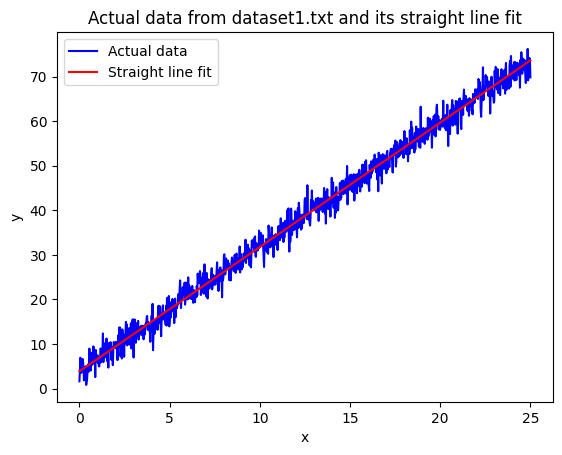

In [4]:
#creating a 2 column matrix M using the x_data1 column vector and a column full of ones.
M=np.c_[x_data1, np.ones(len(x_data1))]

#using least square approximation to estimate the parameters m and c
(m, c), _, _, _ = np.linalg.lstsq(M, y_data1, rcond=None)

#printing out the estimatef parameters
print(f"The estimated value of m is {m}")
print(f"The estimated value of c is {c}")

#plotting the actual data using a blue line and its straight line fit using a red line
plt.plot(x_data1, y_data1,"-b", label="Actual data")
plt.plot(x_data1, m*x_data1+c,"-r",label="Straight line fit")
plt.title("Actual data from dataset1.txt and its straight line fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Plotting the errorbars

* The cell below plots the original data in blue and errorbars in red for every $20^{th}$ datapoint to make it less cluttered.

* On assuming the linearly fit data to be accurate, we calulate the error in y as the absolute value of the difference between the given value and the value predicted by the straight line fit. 

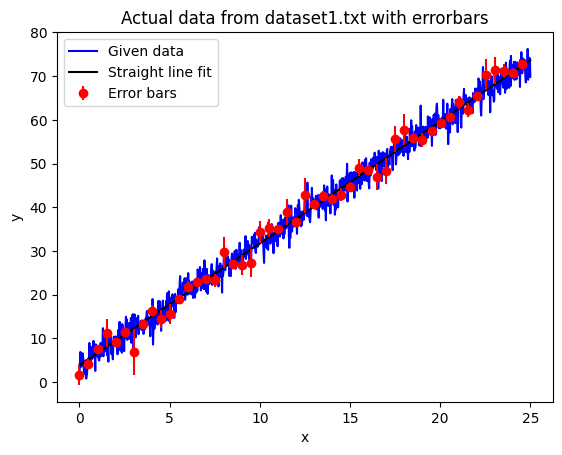

In [5]:
#plotting the original data
plt.plot(x_data1,y_data1,"-b",label="Given data")

#plotting the fit curve
plt.plot(x_data1, m*x_data1+c,"-k",label="Straight line fit")

#errorbars for every 20th datapoint
plt.errorbar(x_data1[::20],y_data1[::20], yerr=abs(m*x_data1+c-y_data1)[::20],fmt='ro',label="Error bars")

#labelling the axes and title
plt.title("Actual data from dataset1.txt with errorbars")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Dataset 2: Fitting a Fourier series to the given data

According to the problem statement, the dataset can be described as a series of sines:
$$y=\sum_{k=1}^{N} a_{k}\sin(k\omega_{0} x) $$

where,

* $\omega_{0}$ is the fundamental frequency
* $a_{k}$ refers to the Fourier coefficients
* $N$ is the number of sines in the series


To fit this curve, the fundamental frequency $\omega_{0}$ should be found first. Then by using the `curve_fit` function from `scipy.optimize`, the Fourier coefficients can be found out.

## Loading the data and plotting it

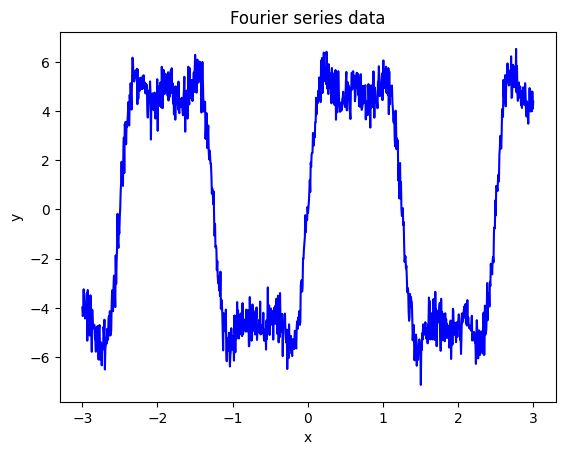

In [6]:
#loading the data
data2 = np.loadtxt("dataset2.txt")

#extracting the data and storing it into arrays
x_data2=data2[:,0]
y_data2=data2[:,1]

#plotting the given data
plt.plot(x_data2,y_data2,"-b")
plt.title("Fourier series data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
#plt.errorbar(x_data2[::5], y_data2[::5], np.std(), fmt='ro')

## Estimating the fundamental frequency

* From the graph of the given data, the fundamental time period $T_{0}$ can be estimated to be 2.5.
* So, the fundamental angular frequency is given by $\omega_{0}=\frac{2\pi}{T_{0}}=0.8\pi$. 

## Fitting a Fourier series on the given data

* In the cell below, we create a function `estimatedfourier` which takes the data set and a variable number of arguments as the input.
* The variable number of arguments are stored is stored in `arg` and they can be accessed by indexing it.
* As we are fitting the data to the curve $ y=\sum_{k=1}^{N} a_{k}\sin(k\omega_{0} x) $, the parameters $a_{1}, a_{2}, ..., a_{N}$ can be given as arguments to the `estimatedfourier` and it can be accessed inside the function by indexing `arg`, like $a_{i}=$ `arg[i-1]`.
* The for loop runs for `len(arg)` times to sum over the N terms in the sine series and returns the sum.

In [7]:
#this function can take a variable number of arguments
def estimatedfourier(x,*arg):

    #fundamental angular frequency
    w0=2*np.pi*0.4
    sum=0

    #evaluating the sum of the series for N terms
    for i in range(1,len(arg)+1):
        sum+=arg[i-1]*np.sin(i*w0*x)
    return sum

* In the cell below, we define a function `fourierfit` which takes an argument `N`, referring to the number of terms of the sine series to fit the curve to.

* We use the `curve_fit` function from `scipy.optimize` to fit the given data to N terms of the sine series. This can be done by specifying an initial guess list `p0` of length `N`, as an argument of the `curve_fit` function.
 * `fourierfit` returns the `parameters` array, containg the estimated values of the fourier coeffiecients $a_{i}$. Here $a_{i}=$ `parameters[i-1]`.

In [8]:
#fitting the data to N terms of the sine series
def fourierfit(N):
    parameters,_=curve_fit(estimatedfourier,x_data2,y_data2,p0=[[1.0]*N])
    return parameters

#fitting data to 7 terms of the sine series and printing the coefficients a1 to a7
print(fourierfit(7))

[ 6.01174927e+00  1.04185231e-03  1.99775867e+00  3.27548924e-02
  9.76536720e-01 -7.10737543e-03  5.59996261e-03]


* In the below cell, we plot the given data in blue and the fit curve in red in the same plot, to compare the accuracy of the fit.

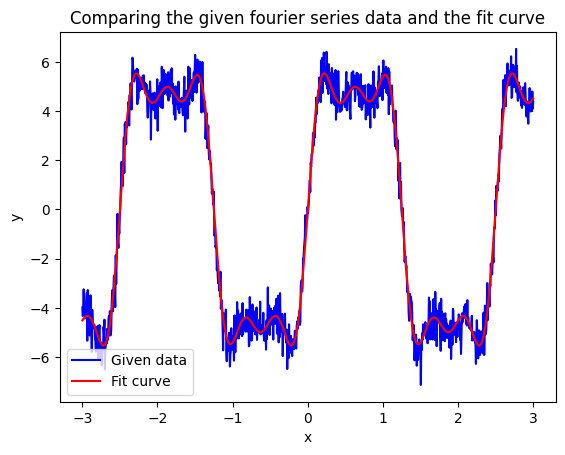

In [9]:
plt.plot(x_data2,y_data2,"-b",label="Given data")

#*fourier(7) adds all the elements of the generated paramters (using fourierfit) as arguments to 
#the function
plt.plot(x_data2,estimatedfourier(x_data2,*fourierfit(7)),"-r", label="Fit curve")

#adding axis labels, legends and title
plt.title("Comparing the given fourier series data and the fit curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Plotting the errorbars

* In the code below, we plot the curve corresponding to the given data, the fit curve and the errorbars.
* Considering the fit curve as the accurate value, we calculate the parameter `yerr` as the absolute value of the difference between the given `y_data2` and the calculated value using the estimated Fourier coefficients.
* To avoid cluttering, errorbars are plotted for every $20^{th}$ datapoint.

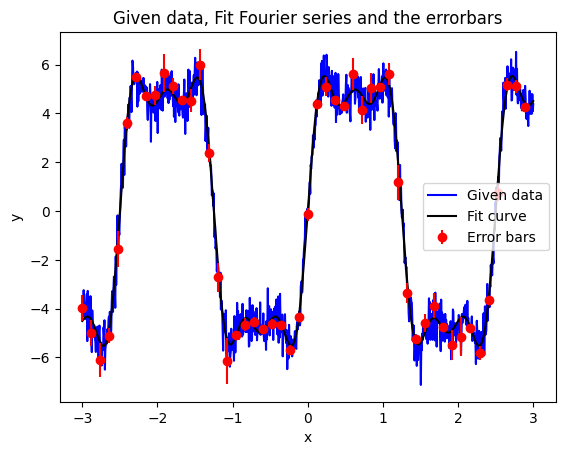

In [10]:
#original data
plt.plot(x_data2,y_data2,"-b",label="Given data")

#the fit curve (7 term sine series)
plt.plot(x_data2,estimatedfourier(x_data2,*fourierfit(7)),"-k", label="Fit curve")

#plotting errorbars for every 20th datapoint (to avoid cluttering)
plt.errorbar(x_data2[::20], y_data2[::20], yerr=np.abs(y_data2-estimatedfourier(x_data2,*fourierfit(7)))[::20], fmt='ro',label="Error bars")

#adding axis labels, legends and title
plt.title("Given data, Fit Fourier series and the errorbars")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Dataset 3: Analysing Spectral radiance and frequency data

The rate of emission of energy per unit area per unit time, per unit frequency interval is called Radiance, which is represented by $R$. It can be expressed as:

$$R(f, T) = \frac{2hf^{3}}{c^{2}(e^{\frac{hf}{kT}}-1)}$$

where, 

* $h$ is the Planck's constant
* $f$ is the frequency of the radiation
* $T$ refers to the temperature of the blackbody
* $c=3.0*10^{8} ms^{-1}$ is the speed of light in vacuum
* $k=1.38*10^{-23} JK^{-1}$ is the Boltzmann constant

## Loading the data and plotting it

* We load the data from `dataset3.txt` into a 2-D array called `data3`, and then we seperate that into different columns to store them into the `f` (frequency data) and `R` (spectral radiance data) arrays.

* Using the `plot` command from the `matplotlib.pyplot` module, the graph between the frequency data and the spectral radiance data can be plotted along with the axis labels and the title.

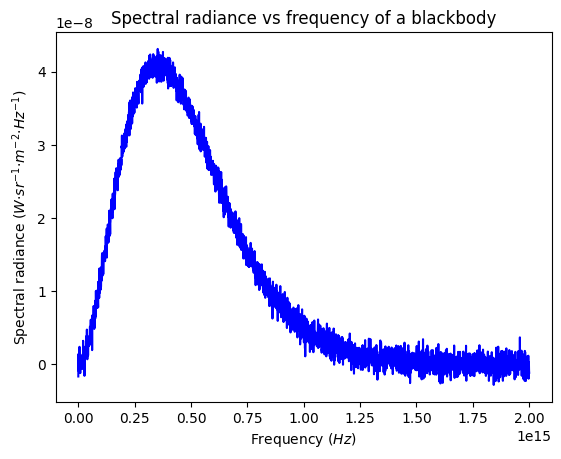

In [11]:
data3 = np.loadtxt("dataset3.txt")

#frequency
f=data3[:,0]

#spectralradiance
R=data3[:,1]

#plotting the given data
plt.plot(f,R,"-b")
plt.title("Spectral radiance vs frequency of a blackbody")
plt.xlabel("Frequency $(Hz)$")
plt.ylabel("Spectral radiance $(W·sr^{−1}·m^{−2}·Hz^{−1})$")
plt.show()



## Fitting the given data

* We're given the data related to $f$, $R$. We also know the values of $k$ (Boltzmann constant) and $c$ (Speed of light in vacuum).
* Using the given data, we need to estimate the parameters $h$ (Planck's constant) and $T$ (absolute temperature).
* We perform non-linear fitting in this case using `scipy.optimize.curve_fit` as the data is to be fit on a non-linear function.

### Finding the parameters $h$ and $T$ by curve fitting

In [12]:
#frequency(Hz) vs Spectral radiance of a body  ( W·sr−1·m−2·Hz−1)
def spectralradiance(f,h,T):
    #l for wavelength and T for temperature
    k=1.38e-23
    c=3.0e8
    return 2*h*(np.power(f,3))/((c**2)*(np.exp(h*f/(k*T))-1))

In the above cell, we define the `spectralradiance` function which takes the frequency data (f), Planck's constant (h) and absolute temperature (T) as arguments and returns the value of spectral radiance as the output.

In [13]:
#curvefitting using inital guesses for h and T
zp1, zp2= curve_fit(spectralradiance, f,R, p0=[1e-34,5000])

#zp1 contains the value of the parameters while zp2 contains the covariance matrix
h_estimate=zp1[0]
T_estimate=zp1[1]

print(f"Estimated value of h is {h_estimate} Js.")
print(f"Estimated value of T is {T_estimate} K.")

Estimated value of h is 6.643229747663249e-34 Js.
Estimated value of T is 6011.361514579023 K.


* In the above cell, we use the `curve_fit` function of the `scipy` library to find the parameters h and T. By default, the Levenberg–Marquardt algorithm is used.
* As arguments, we give the name of the function `spectralradiance` along with the input and output datasets(`f` contains the frequency data and `R` contains the spectral radiance data).
* `p0` contains the intial guesses of the parameters `h` and `T` respectively in form of a list.
* After some experimentation, the inital guesses `1e-34` for `h` and `5000` for `T` gives a quite an accurate fit.
* The outputs `zp1` contains the calculated value of the parameters `h` and `T` as a list, while `zp2` contains the covariance matrix. We extract the estimated values, store them in `h_estimate` and `T_estimate` and print them.

### Calculating the spectral radiance using the estimated parameters and given frequency data

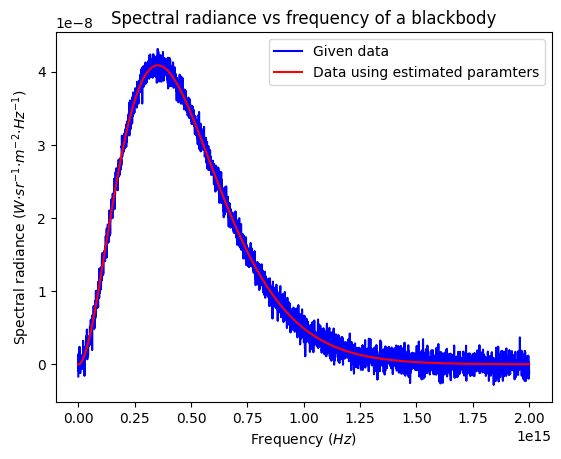

In [14]:
#plotting to check how the curve fit is
plt.plot(f,R,"-b",label='Given data')
plt.plot(f,spectralradiance(f,h_estimate,T_estimate),"-r",label="Data using estimated paramters")

#adding titles, axes labels and legends
plt.title("Spectral radiance vs frequency of a blackbody")
plt.xlabel("Frequency $(Hz)$")
plt.ylabel("Spectral radiance $(W·sr^{−1}·m^{−2}·Hz^{−1})$")
plt.legend()
plt.show()

## Plotting the errorbars



* We consider the data generated from the fit curve as the actual data and set the `yerr` to the absolute value of the difference between the given data and the output of the `spectralradiance` function with arguments `f`, `h=h_estimate` and `T=T_estimate`.

* To reduce cluttering, errorbars for every $50^{th}$ point of the dataset is plotted.

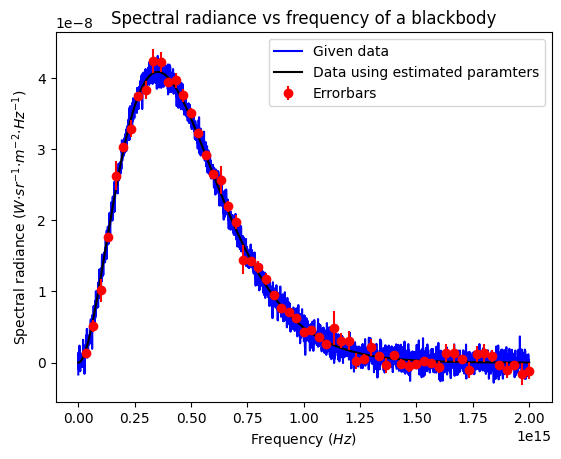

In [15]:
#plotting the original data
plt.plot(f,R,"-b",label='Given data')

#plottig the fit curve
plt.plot(f,spectralradiance(f,h_estimate,T_estimate),"-k",label="Data using estimated paramters")

#plotting errorbars for every 50th sample
plt.errorbar(f[::50], R[::50], yerr=np.abs(R-spectralradiance(f,h_estimate,T_estimate))[::50], fmt='ro',label="Errorbars")

plt.title("Spectral radiance vs frequency of a blackbody")
plt.xlabel("Frequency $(Hz)$")
plt.ylabel("Spectral radiance $(W·sr^{−1}·m^{−2}·Hz^{−1})$")
plt.legend()
plt.show()

# Dataset 4: Examining a scatter plot

## Loading the dataset and plotting it

* We load the data in `dataset4.txt` to a 2-D array called `data4` and seperate it into x-values and the y-values.

* As each value in the dataset has a different number of y-values (like 0 and 10, has 50 corresponding y-values, others have 100 correspnding y-values), we use a brute force approach to calculate a list of means `y_list`.

* An array `x_list` is created that has each x value only once from 0 to 10.

* The scatter plot  and the mean is plotted in the same graph, using `plt.scatter` and `plt.plot`.

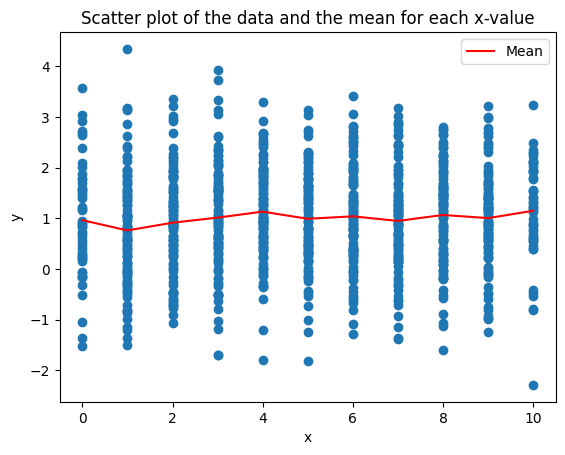

In [82]:
#loading the dataset and extracting the values
data4 = np.loadtxt("dataset4.txt")
x_data4=data4[:,0]
y_data4=data4[:,1]

#this list stores the mean of y-values corresponding to a single x-value
y_list=[0]*11
for i in range(0,11):
    if i==0:
        y_list[0]=np.mean(y_data4[0:50])
    elif i==10:
        y_list[10]=np.mean(y_data4[950:1000])
    else:
        y_list[i]=np.mean(y_data4[100*i-50:100*i+50])
    

#making the scatter plot and plotting the mean
x_list=np.arange(0,11,1)
plt.scatter(x_data4,y_data4)
plt.plot(x_list,y_list,"-r",label="Mean")

#adding title, labels and legend
plt.title("Scatter plot of the data and the mean for each x-value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Fitting the mean curve

* As the mean curve has some jagged edges, we try to estimate it as a series as a sawtooth signals (as in `scipy.signal.sawtooth`) of different amplitudes and different frequencies, like 

$$y=k+\sum_{i=1}^{N} a_{i}*sawtooth(i\omega_{0}x)$$
where, $sawtooth(x)$ is a linearly increases from -1 to 1 in a x interval of 0 to $2\pi$.

* After using `curve_fit` and estimating (as a series of 15 signals in this case), we plot the original mean curve and the fit curve. 

[ 0.99989238  1.09985895  0.14750757  1.30668754  2.43490835 -0.05165847
 -1.15756705 -0.11714291 -1.3944347  -1.28965998 -3.76775717 -1.30699744
  0.98513037  1.47107091  2.87753194]


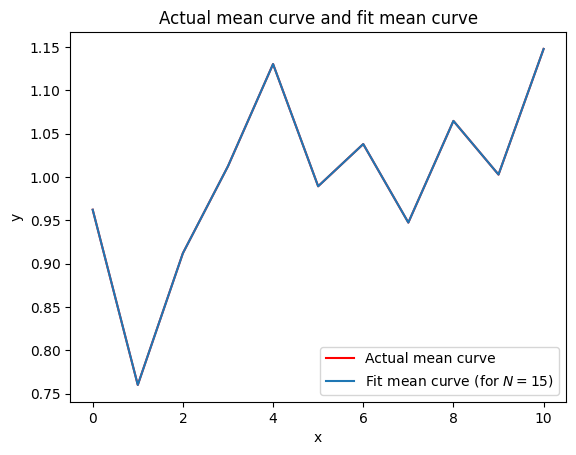

In [90]:
from scipy import signal
def estimatedsawtooth(x,*arg):

    #fundamental angular frequency
    w0=arg[0]

    #dc offset
    k=arg[1]

    sum=k

    #evaluating the sum of the series for N terms
    for i in range(1,len(arg)-1):
        sum+=arg[i+1]*signal.sawtooth(i*w0*x)
    return sum

#for now we estimate the data to be a sum of 15 sawtooth signals
values1,_=curve_fit(estimatedsawtooth,x_data4,y_data4,[1.0]*15)
print(values1)

#plotting the original mean curve and the fit curve
plt.plot(x_list,y_list,"-r",label="Actual mean curve")
plt.plot(x_list,estimatedsawtooth(x_list,*values1),label="Fit mean curve (for $N=15$)")

#adding title, labels and legend
plt.title("Actual mean curve and fit mean curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In the below cell, we plot the given data as a scatter plot along with the actual mean curve and the
fit mean curve.

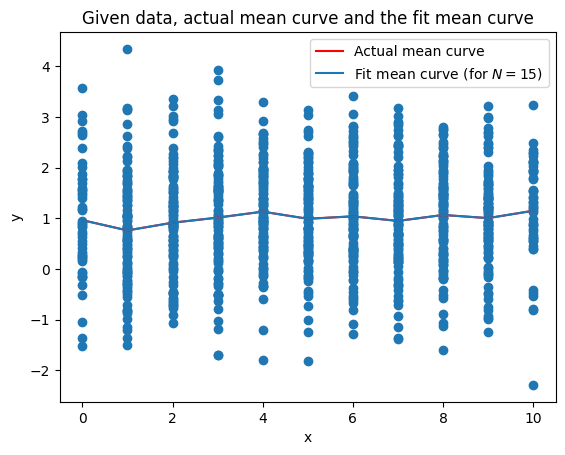

In [91]:
#plotting the scatterplot and mean plots in the same graph
plt.scatter(x_data4,y_data4)
plt.plot(x_list,y_list,"-r",label="Actual mean curve")
plt.plot(x_list,estimatedsawtooth(x_list,*values1),label="Fit mean curve (for $N=15$)")

#adding title, labels and legend
plt.title("Given data, actual mean curve and the fit mean curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Comparing the speed and accuracy of `lstsq` and `curve_fit` for a straight line fit

## Generating the data and plotting it

* As per the problem statement, we use the same dataset used in the class with gaussian noise of same standard deviation.

* Actual data is evaluated by passing the array `t` to the function `stline` (represents the line $y=3x+1.2$).

* Noisy data is generated by adding a Gaussian noise of mean 0 and variance 1 to the actual data.

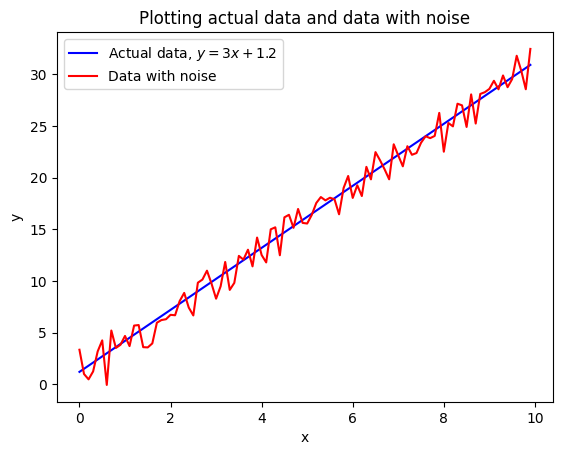

In [17]:
#creating a series of 100 timestamps
t = np.arange(0, 10, 0.1)

#creating a function to represent a straight line
def stline(x, m, c):
    return m * x + c

#the correct data
y = stline(t, 3, 1.2)

#correct data along with Gaussian noise
n = 1 * np.random.randn(len(t))
yn = y + n


#plotting the correct data and the data with noise
plt.plot(t, y,"-b",label="Actual data, $y=3x+1.2$")
plt.plot(t, yn,"-r", label="Data with noise")

#adding labels, legends and titlet, yn,"-r", label="Data with noise"
plt.title("Plotting actual data and data with noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Comparing the speed of `numpy.linalg.lstsq` and `scipy.optimize.curve_fit`

* In the cell below we define a function `linearfit` that takes the input arrays as the arguments, makes a linear fit to the curve $y=mx+c$ and returns the parameters $m$ and $c$.

* We call `linearfit` with the arguments `xdata` as `t` and `ydata` as `yn` (noisy y data) and print the estimated $m$ and $c$, stored in `solution`.

* It takes an average of $26$ to $27 \mu s$ to make the linear fit.

In [24]:
def linearfit(xdata, ydata):
    M = np.column_stack([xdata, np.ones(len(xdata))])
    # Use the lstsq function to solve for p_1 and p_2
    solution, _, _, _ = np.linalg.lstsq(M, ydata, rcond=None)
    return solution

print(linearfit(xdata=t,ydata=yn))
%timeit linearfit(xdata=t,ydata=yn)

[3.02089233 0.96521379]
26.6 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


* A similar function `curvefit` is defined to take the input arrays as arguments and perform curve fitting using `scipy.optimize.curve_fit` and `stline` function defined before and return the parameters $m$ and $c$.

* We call `curvefit` with the arguments `xdata` as `t` and `ydata` as `yn` (noisy y data) and print the estimated $m$ and $c$, stored in `solution2`.

* It takes an average of around $200\mu s$ to fit the data into the required curve.

In [25]:
def curvefit(xdata, ydata):
    solution2,_=curve_fit(stline, xdata, ydata)
    return solution2

print(curvefit(xdata=t, ydata=yn))
%timeit curvefit(xdata=t, ydata=yn)

[3.02089233 0.96521382]
214 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Conclusion

`numpy.linalg.lstsq` is faster than `scipy.optimize.curve_fit` in fitting the above data to a straight line.

## Comparing the accuracy of `numpy.linalg.lstsq` and `scipy.optimize.curve_fit`

Both these methods give almost the same error in estimating the parameters $m$ and $c$ of a noisy straight line. An error of 0.696% is obtained on estimating $m$ and an error of 19.56% is obtained on the estimation of $c$.

In [40]:
actual=np.array([3,1.2])
print(f"Errors by numpy.linalg.lstsq:")
print(f"    Error in estimating m:  {np.abs(actual-linearfit(t,yn))[0]}, {np.abs(actual-linearfit(t,yn))[0]*100/np.abs(actual[0])} %")
print(f"    Error in estimating c:  {np.abs(actual-linearfit(t,yn))[1]}, {np.abs(actual-linearfit(t,yn))[1]*100/np.abs(actual[1])} %")

print(f"Errors by scipy.optimize.curve_fit:")
print(f"    Error in estimating m:  {np.abs(actual-curvefit(t,yn))[0]}, {np.abs(actual-curvefit(t,yn))[0]*100/np.abs(actual[0])} %")
print(f"    Error in estimating c:  {np.abs(actual-curvefit(t,yn))[1]}, {np.abs(actual-curvefit(t,yn))[1]*100/np.abs(actual[1])} %")


Errors by numpy.linalg.lstsq:
    Error in estimating m:  0.020892333316681277, 0.6964111105560425 %
    Error in estimating c:  0.23478620662511385, 19.56551721875949 %
Errors by scipy.optimize.curve_fit:
    Error in estimating m:  0.020892332660945367, 0.6964110886981789 %
    Error in estimating c:  0.234786180772244, 19.56551506435367 %
